In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [34]:
colors = [['#d8c7ff' for j in range(20)] for i in range(20)]
for i in range(20):
    for j in range(20):
        if (i == 0 or i==19 or j==0 or j==19):
            colors[i][j] = '#000000'
colors[2][5] = '#000000'
for i in range(2,5):
    colors[i][5] = '#000000'
for i in range(3,17):
    colors[4][i] = '#000000'
for i in range(4,8):
    colors[i][3] = '#000000'
for i in range(6,13):
    colors[i][6] = '#000000'
for i in range(1,5):
    colors[10][i] = '#000000'
for i in range(3,8):
    colors[12][i] = '#000000'
for i in range(12,16):
    colors[i][7] = '#000000'
for i in range(1,3):
    colors[17][i] = '#000000'
for i in range(7,13):
    colors[17][i] = '#000000'
for i in range(6, 11):
    colors[i][9] = '#000000'
for i in range(10,15):
    colors[i][10] = '#000000'
for i in range(7,13):
    colors[17][i] = '#000000'
for i in range(11,16):
    colors[i][13] = '#000000'
for i in range(13,17):
    colors[15][i] = '#000000'
for i in range(12,16):
    colors[7][i] = '#000000'
for i in range(6,12):
    colors[i][15] = '#000000'
for i in range(15,18):
    colors[11][i] = '#000000'
for i in range(11,14):
    colors[i][17] = '#000000'

    

In [35]:
class PolicyIteration:

    
    def __init__(self, discount, p):
        self.p = p
        self.discount = discount
        self.pi = [[0.25, 0.25, 0.25, 0.25] for i in range(400)] 
        self.V = np.zeros(400)
        self.pe_count = 0
        self.pi_count = 0
        
    def getProbability(self,curr,s,a): #returns next position
        if ((s == curr+20 and a == 0) or (s == curr-20 and a == 1)):
            return 1-self.p
        if ((s == curr-1 and a == 2) or (s == curr+1 and a == 3)):
            return 1-self.p
        else: return self.p/3
        
    def getStateValue(self,curr):
        v = 0
        for a in range(4):
            for s in [curr+20, curr-20, curr+1, curr-1]:#for every next possible state
                sv = self.V[s]
                if(colors[ int(s / 20)][s % 20] == '#000000'): #if you've hit a wall, you reach curr 
                    sv = self.V[curr]
                prob = self.getProbability(curr,s, a) 
                v += self.pi[curr][a] * prob * (rewards[s] + self.discount * sv)
        return v
    
    def policyEvaluation(self):
        self.pe_count += 1
        delta = 0
        for i in range(1,19):
            for j in range(1,19):
                if(colors[i][j] != '#000000'):
                    #print((20*i) + j)
                    v = self.V[(20*i) + j]
                    self.V[(20*i) + j] = self.getStateValue((20*i) + j)
                    delta = max(delta, abs(v - self.V[(20*i) + j]))
        if (delta >= 0.001):
            self.policyEvaluation()
    #returns probability associated with each action using current state-values
    
    def updatePolicy(self,curr):
        max_action = []
        val = -10000
        for a in range(4):
            temp = 0
            for s in [curr+20, curr-20, curr+1, curr-1]:
                sv = self.V[s]
                if(colors[ int(s / 20)][s % 20] == '#000000'): #if you've hit a wall, you reach curr 
                    sv = self.V[curr]
                temp += self.getProbability(curr, s,a) * (rewards[s] + self.discount*sv) 
            max_action.append(temp)

        #max_indicies = np.argwhere(max_action == np.amax(max_action)).flatten()
        max_index = np.argmax(max_action)

        #reset values to insert probabilities
        max_action = [0 for i in range(4)]
        max_action[max_index] = 1

        #insert probabilities 
    #     for i in max_indicies:
    #         max_action[i] = 1/len(max_indicies)
    #     max_action = np.argmax(max_action)



        return max_action
    
    def policyImprovement(self):
        while True:
            self.pi_count += 1
            policy_stable = True
            for i in range(1,19):
                for j in range(1,19):
                    if(colors[i][j] == '#C0C0C0'): 
                        continue    
                    #get action with highest probability, break tie arbitrarily 
                    b = np.argwhere(self.pi[(20*i) + j] == np.amax(self.pi[(20*i) + j])).flatten() 
                    b = b[np.random.randint(low=len(b))]
                    #b = pi[(20*i) + j]

                    #update policy 
                    self.pi[(20*i) + j] = self.updatePolicy((20*i) + j)

                     #pick best action
                    a = np.argwhere(self.pi[(20*i) + j] == np.amax(self.pi[(20*i) + j])).flatten() 
                    a = a[np.random.randint(low=len(a))]
                    #a = pi[(20*i) + j]

                    if (b != a):
                        policy_stable = False
            if(policy_stable == False):
                self.policyEvaluation()
            else: return (self.pi, self.V)

    

In [36]:


def getTable(cell_values):
    val1 = [str(i) for i in range(20)] 
    val2 = ["  " + str(i) + "  " for i in range(20)] 
    fig, ax = plt.subplots(figsize=(15,10)) 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = cell_values, #empty values 
        rowLabels = val2,  
        colLabels = val1, 
        rowColours =["w"] * 20,  
        colColours =["w"] * 20, 
        cellColours=colors,
        cellLoc ='center',
        loc ='center')  
    table.scale(xscale= 1.2, yscale=1.3)

    #Adding walls


    ax.set_title('matplotlib.axes.Axes.table() function Example', 
                 fontweight ="bold")

    return table

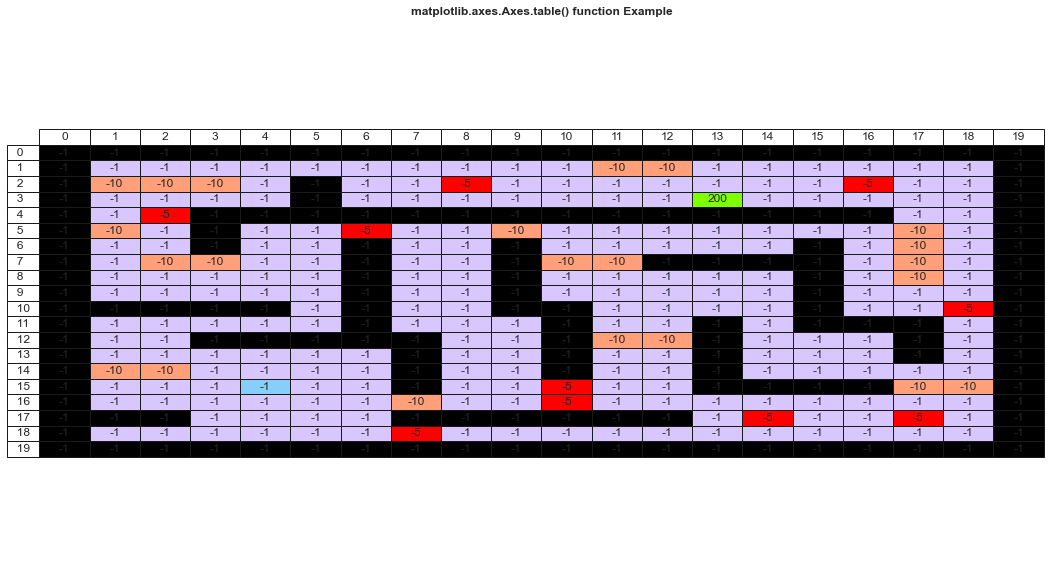

In [37]:
#reward space
rewards = [-1 for r in range(20*20)]

oil = [[4,2],[5,6],[2,8],[2,16],[5,6],[10,18],[18,7], [15,10],[16,10],[17,17],
      [17,14]]
for cell in oil:
    rewards[(20*cell[0])+cell[1]] = -5
    colors[cell[0]][cell[1]] = '#FF0000'
     

bump = [[1,11],[1,12],[2,1],[2,2],[2,3], [5,17],[6,17], [7,17],[8,17],
       [14,1],[14,2],[15,18],[15,17],[16,7],[5,1],[5,9],[7,3],[5,9],[7,2],
       [7,10],[7,11],[12,11],[12,12]]
for cell in bump:
    rewards[(20*cell[0])+cell[1]] = -10
    colors[cell[0]][cell[1]] = '#FFA07A'

#cell_values[3][13] = '200'
rewards[(20*3)+13] = 200
colors[3][13] = '#7FFF00'

colors[15][4] = '#87CEFA'

rewards = np.asarray(rewards)

r_table = getTable(rewards.reshape((20,20)))

In [38]:
def showPolicy(pi):
    pi_str = ['' for i in range(400)]
    for index, p in enumerate(pi):
        b = np.argwhere(p == np.amax(p)).flatten() 
        for a in b:
            if(a == 0):
                pi_str[index] += '↓'
            if(a ==1):
                pi_str[index] += '↑'
            if(a == 2):
                pi_str[index] += '←'
            if(a == 3):
                pi_str[index] += '→'
    pi_str = np.asarray(pi_str)
    return getTable(pi_str.reshape((20,20))) 
    

### Policy Iteration : discount = 0.95, p = 0.02

iterations for policy improvement: 15 
 iterations for policy evaluation 798


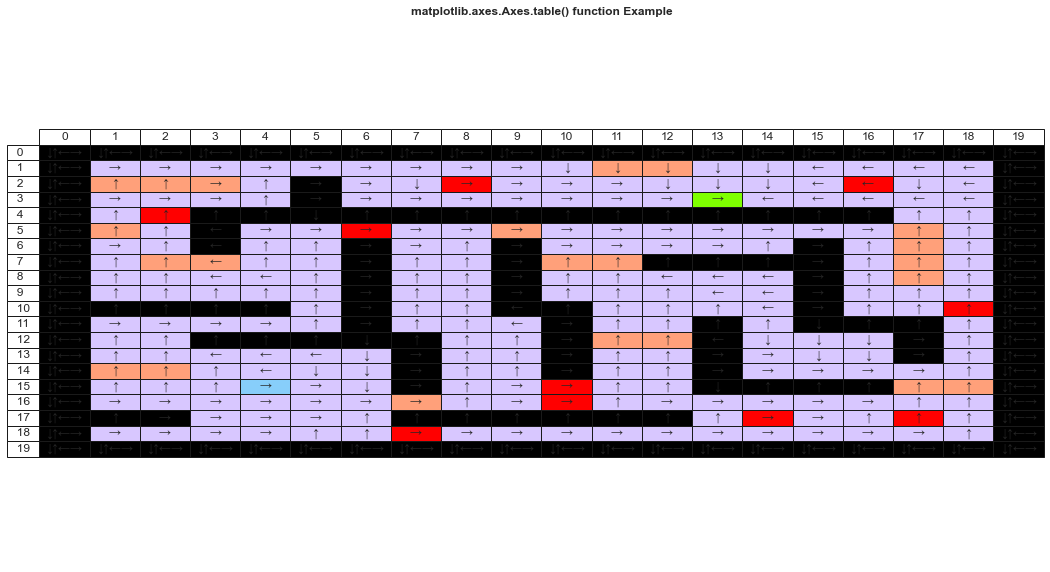

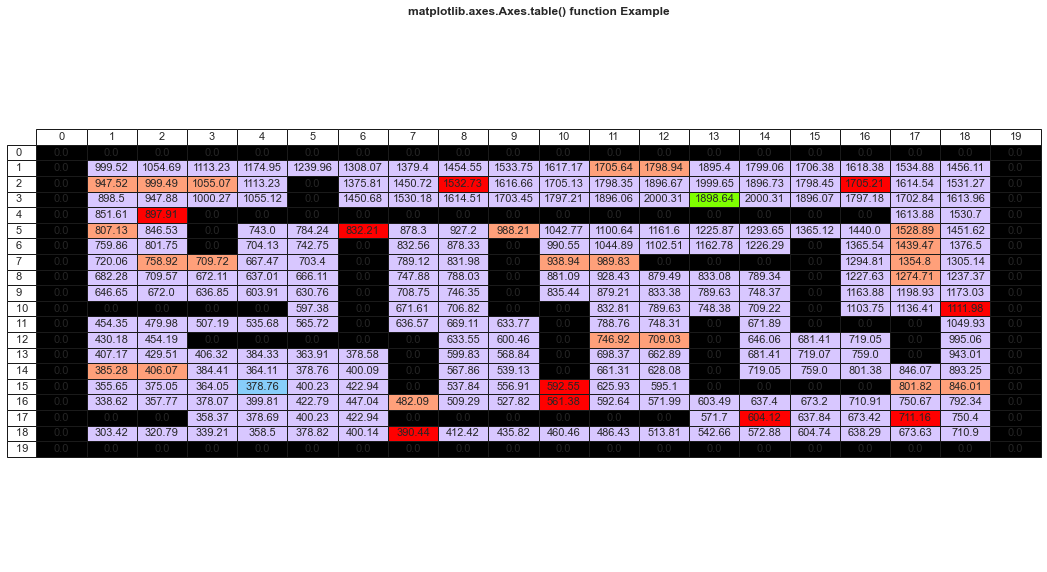

In [21]:
pi = PolicyIteration(discount = 0.95, p = 0.02)
policy, V = pi.policyImprovement()
showPolicy(policy)
V = np.around(V,decimals=2)
vs_table = getTable(V.reshape((20,20)))
print('iterations for policy improvement: {} \n iterations for policy evaluation {}'.format(pi.pi_count, pi.pe_count))

### Policy Iteration : discount = 0.95, p = 0.5

iterations for policy improvement: 12 
 iterations for policy evaluation 533


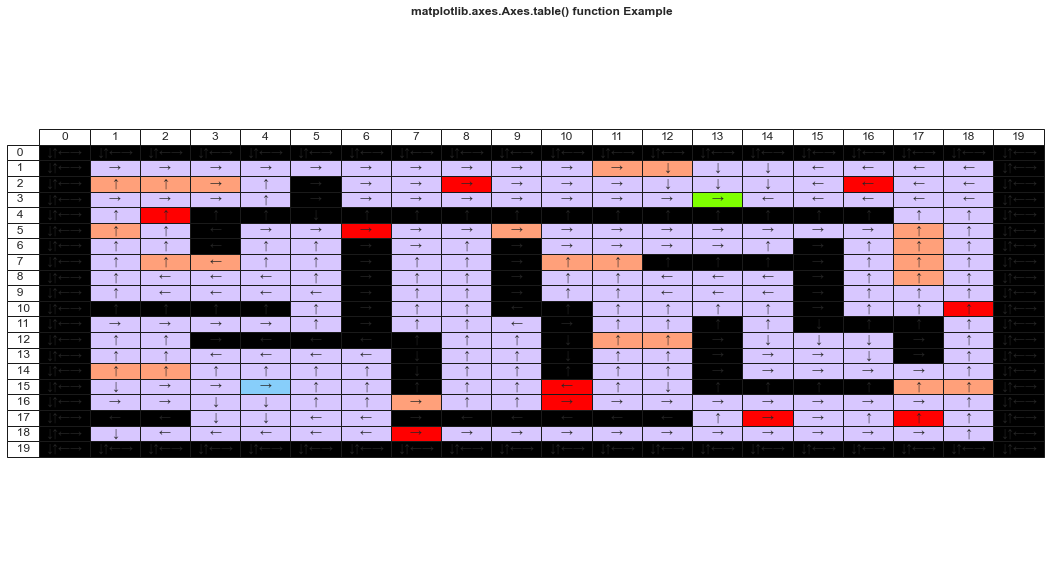

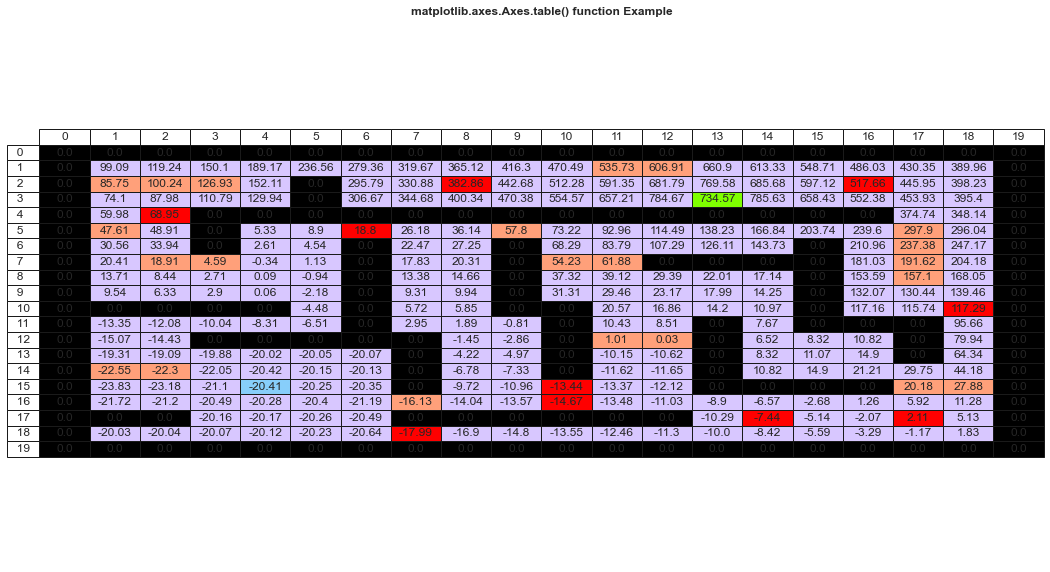

In [22]:
pi = PolicyIteration(discount = 0.95, p = 0.5)
policy, V = pi.policyImprovement()
showPolicy(policy)
V = np.around(V,decimals=2)
vs_table = getTable(V.reshape((20,20)))
print('iterations for policy improvement: {} \n iterations for policy evaluation {}'.format(pi.pi_count, pi.pe_count))

### Policy Iteration : discount = 0.55, p = 0.02

iterations for policy improvement: 13 
 iterations for policy evaluation 71


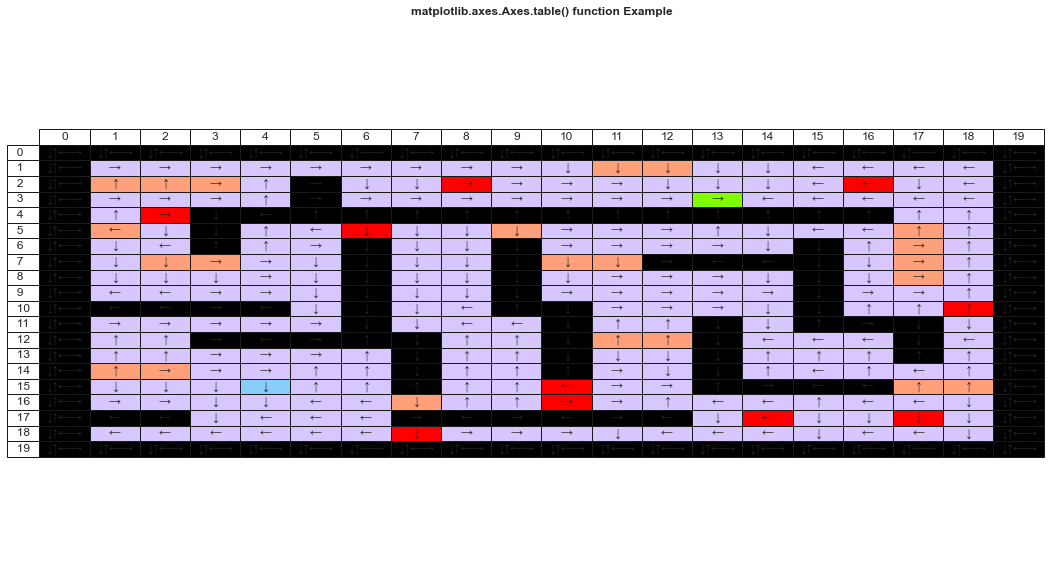

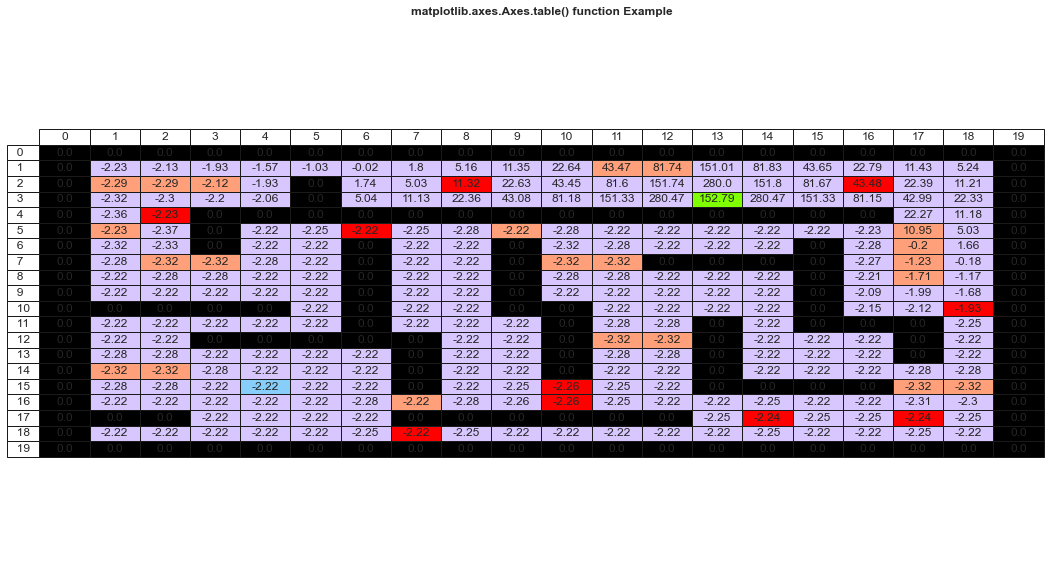

In [16]:
pi = PolicyIteration(discount = 0.55, p = 0.02)
policy, V = pi.policyImprovement()
showPolicy(policy)
V = np.around(V,decimals=2)
vs_table = getTable(V.reshape((20,20)))
print('iterations for policy improvement: {} \n iterations for policy evaluation {}'.format(pi.pi_count, pi.pe_count))

## Policy Iteration Analysis

According to the results, the base scenario had the most iterations for both policy evaluation and policy improvement. This was expected since having a high discount factor means that each V(s) in each iteration of policy evaluation will be highly influenced by changes in other V(s) throughout the board. This is compounded by a low p value, which strongly relates V(s) with a specific neighboring V(s'). In terms of policy, this scenario should result in the best policy in comparison to the other set-ups. This is because a high disocunt factor results in an increase in willingness for delayed gratification, paving the way for an optimal path. Scenario two with a discount of 0.95 and a p=0.5 had the second largest number of policy evaluation iterations. Despite having high sensitivtity to changes in other V(s), the higher p value results in the  averaging of all neighboring V(s'). The result is a more balanced weight to each V(s'), which exacberates the rate of convergence. The resultant policy was less optimal than scenario one, which makes sense since the agent was more significantly influenced by all neighboring V(s) even when the policy was deterministic. Scenario 3 had the least number of iterations. This too was expected since updating V(s) for any given state is only slightly influenced by a single neighbor. This is because of the low discount factor and low p-value. Due to this setup, the agent behaved greedily and was less willing to go through bumps and oil. Policy improvements were roughly the same for each scenario, this was also expected since p and disocunt factors shouldn't influence the rate of convergence to a final policy.

In [41]:
class ValueIteration:

    
    def __init__(self, discount, p):
        self.discount = discount
        self.p = p
        self.count = 0
        self.pi = [[0.25, 0.25, 0.25, 0.25] for i in range(400)] #up, down, left, right
        self.V = np.zeros(400)
        self.actions = np.zeros(400)
        self.change_action = 0
    
    def getProbability(self,curr,s,a): #returns next position
        if ((s == curr+20 and a == 0) or (s == curr-20 and a == 1)):
            return 1-self.p
        if ((s == curr-1 and a == 2) or (s == curr+1 and a == 3)):
            return 1-self.p
        else: return self.p/3
        
        
    def update_state_value(self,curr):
        max_action = []
        for a in range(4):
            temp = 0
            for s in [curr+20, curr-20, curr+1, curr-1]:
                sv = self.V[s]
                if(colors[ int(s / 20)][s % 20] == '#000000'): #if you've hit a wall, you reach curr 
                    sv = self.V[curr]
                temp += self.getProbability(curr, s,a) * (rewards[s] + self.discount*sv) 
            max_action.append(temp)
        if (np.argmax(max_action) != self.actions[curr]):
            self.change_action += 1
            self.actions[curr] = np.argmax(max_action)
                

        return max(max_action)
    
    def update_policy(self,curr):
        max_action = []
        val = -10000
        for a in range(4):
            temp = 0
            for s in [curr+20, curr-20, curr+1, curr-1]:
                sv = self.V[s]
                if(colors[ int(s / 20)][s % 20] == '#000000'): #if you've hit a wall, you reach curr 
                    sv = self.V[curr]
                temp += self.getProbability(curr, s,a) * (rewards[s] + self.discount*sv) 
            max_action.append(temp)

        #max_indicies = np.argwhere(max_action == np.amax(max_action)).flatten()
        max_index = np.argmax(max_action)

        #reset values to insert probabilities
        max_action = [0 for i in range(4)]
        max_action[max_index] = 1

        return max_action
        
    def value_iteration(self):
        while True:
            self.count += 1
            delta = 0
            for i in range(20):
                for j in range(20):
                    if(colors[i][j] == '#000000'):
                        continue
                    v = self.V[20*i + j]
                    self.V[20*i + j] = self.update_state_value(20*i + j)
                    delta = max(delta, abs(v - self.V[20*i + j]))
            if (delta < 0.0001):
                for i in range(1,19):
                    for j in range(1,19):
                        if(colors[i][j] == '#000000'): 
                            continue
                        self.pi[20*i + j] = self.update_policy(20*i + j)
                print(self.V[1])
                return (self.pi, self.V)
                        
                
                    


### Value Iteration : discount = 0.95, p = 0.02

0.0
number of iterations: 150
number of times actions changed: 556


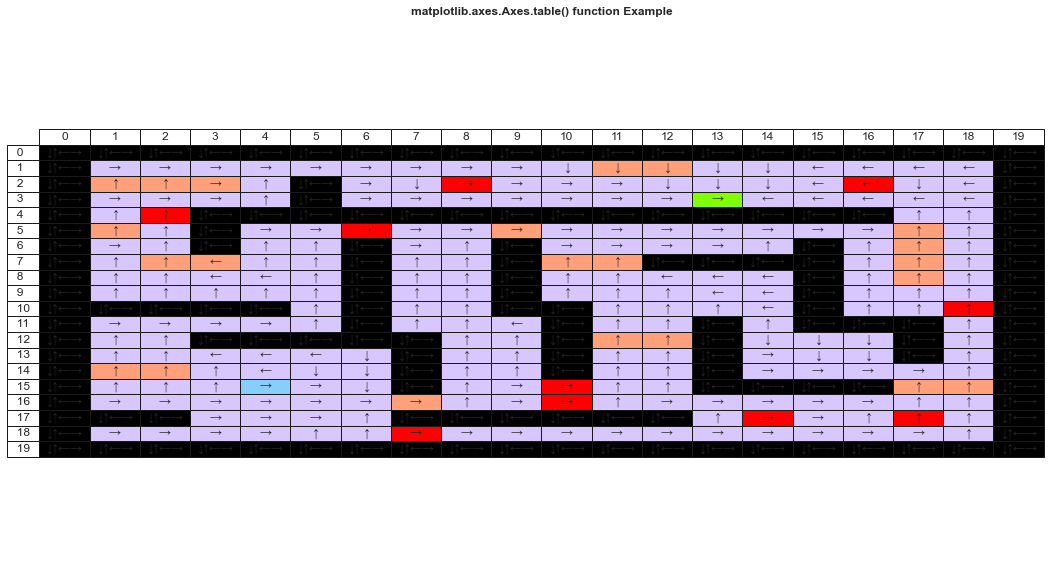

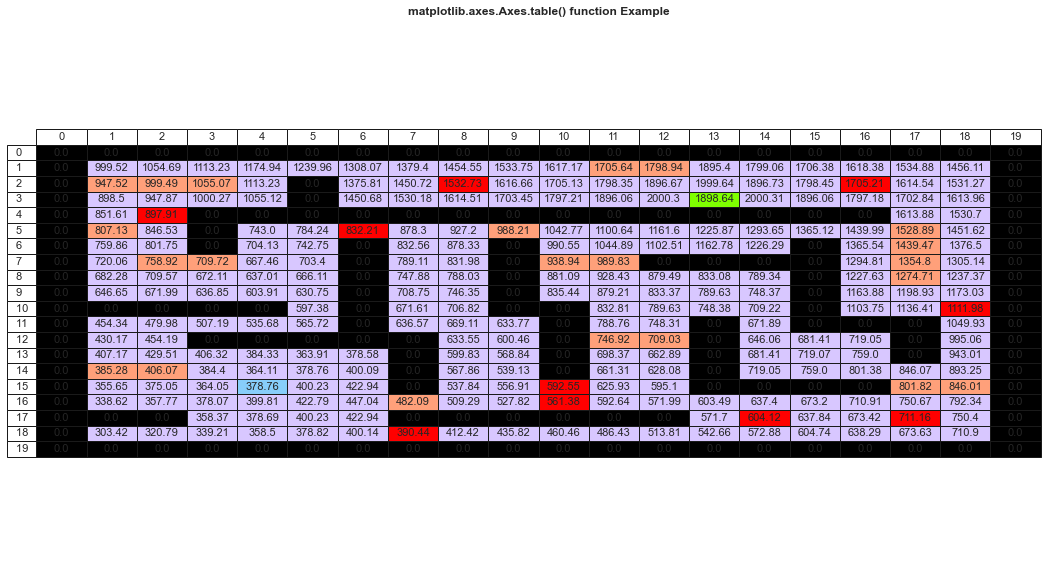

In [42]:
vi  = ValueIteration(discount = 0.95, p = 0.02)
policy, V = vi.value_iteration()
showPolicy(policy)       
V = np.around(V,decimals=2)
vs_table = getTable(V.reshape((20,20)))
print('number of iterations: {}'.format(vi.count))
print('number of times actions changed: {}'.format(vi.change_action))
        

### Value Iteration : discount = 0.95, p = 0.5

0.0
number of iterations: 156
number of times actions changed: 641


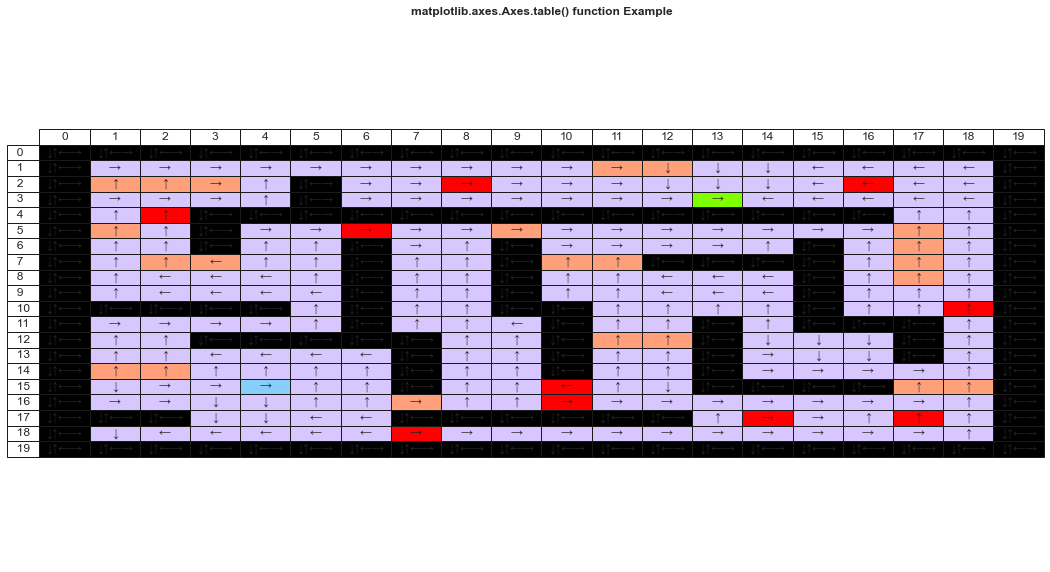

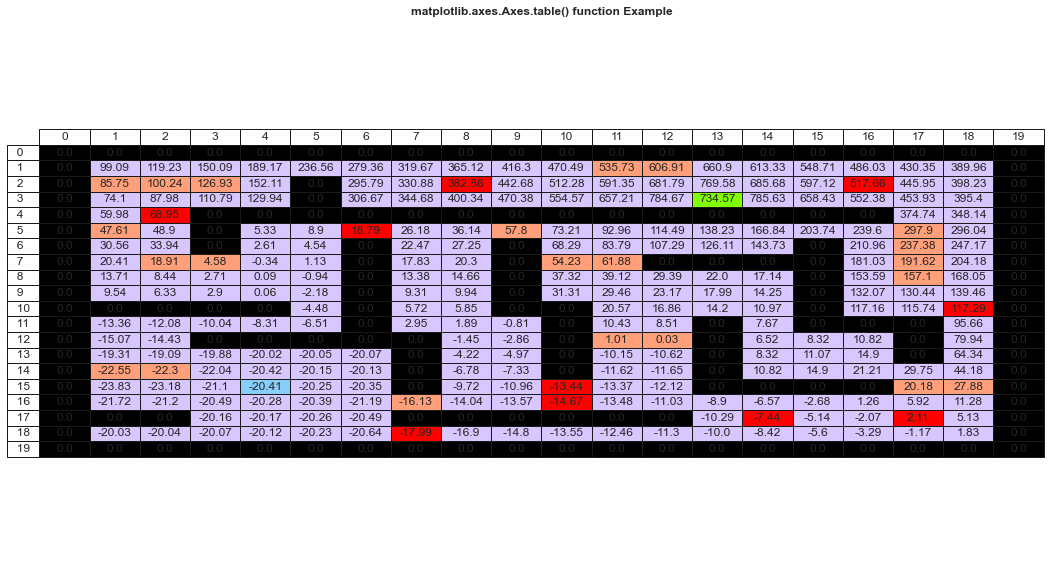

In [44]:
vi  = ValueIteration(discount = 0.95, p = 0.5)
policy, V = vi.value_iteration()
showPolicy(policy)       
V = np.around(V,decimals=2)
vs_table = getTable(V.reshape((20,20)))
print('number of iterations: {}'.format(vi.count))
print('number of times actions changed: {}'.format(vi.change_action))

### Value Iteration : discount = 0.55, p = 0.02

0.0
0.0
number of iterations: 20
number of times actions changed: 392


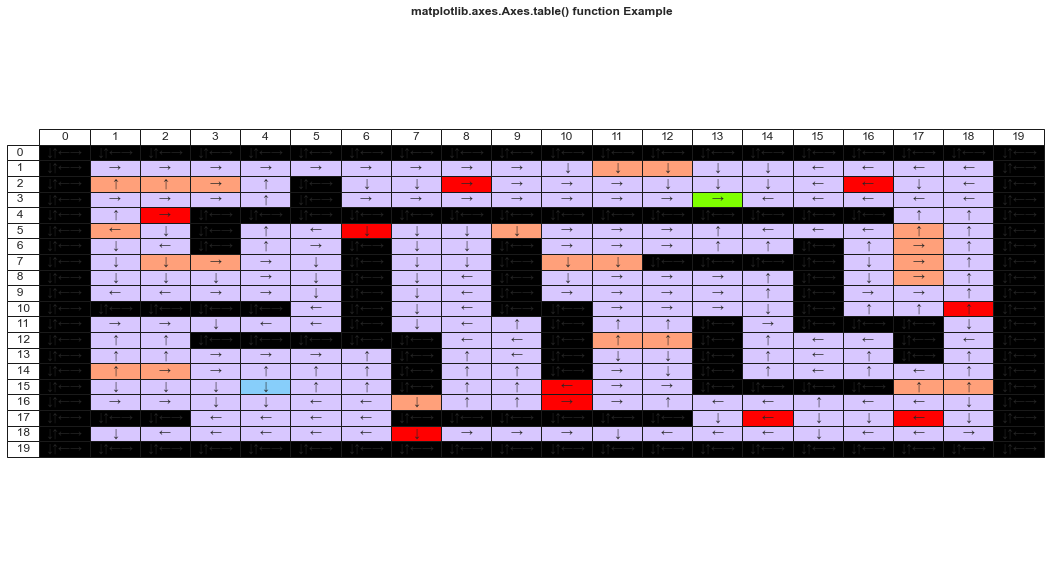

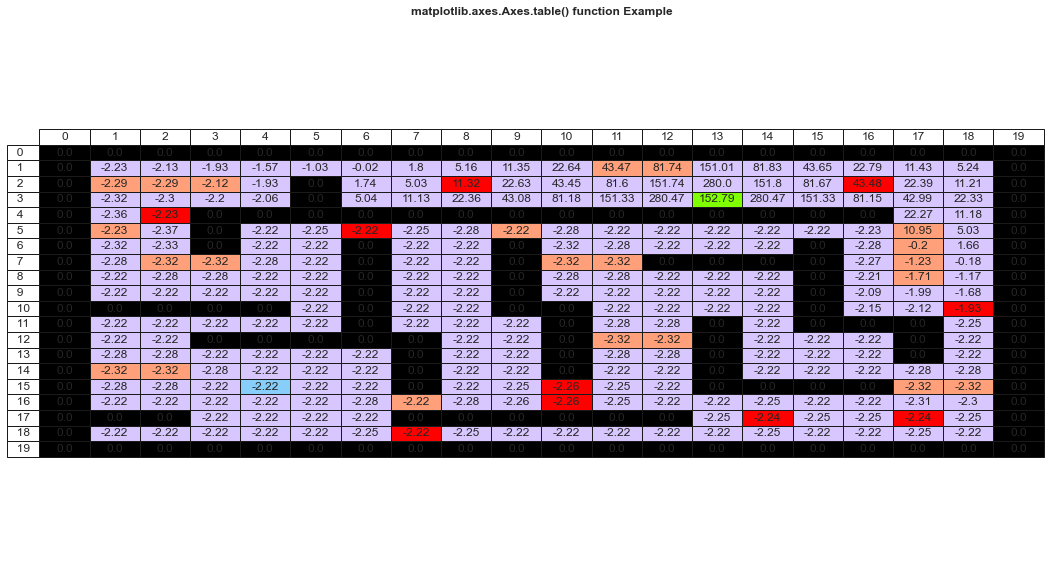

In [45]:
pi, V = ValueIteration(discount = 0.55, p = 0.02).value_iteration()
vi  = ValueIteration(discount = 0.55, p = 0.02)
policy, V = vi.value_iteration()
showPolicy(policy)       
V = np.around(V,decimals=2)
vs_table = getTable(V.reshape((20,20)))
print('number of iterations: {}'.format(vi.count))
print('number of times actions changed: {}'.format(vi.change_action))

## Value Iteration Analysis

Scenario one has the state-values being highly sensitive to changes in other state-values and the value of each action is heavily influnced by changesin a particular neighbors state-value. Because of this sensitivity to change, I expected a high iteration count. However, with a low p and high discount factor, the policy should be the most optimal. This is because the agent is more willing to accept delayed reward and is more confident in each action's ability to get to the desired state.   

Scenario two reduces the ability of each action to place the agent in the desired state. However, the state-values of the neighboring states factor in rewards down the road. The result is multiple flucations in what is considered This results in  highly influenced by current "policy" and neigboring V(s). The result is more uniform weight distribution assigned to neigboring V(s'). This ocould change which action produces the max value for a given iteration, which should cause more fluctuations in V(s). The result should be greater number of iterations before convergence. In terms of policy this setup should be less optimal than scenario one as it punishes states that are in proximity to oil and bumps. This is due to the stochacisitiy of each action. 

Scenario three minimizes the influence of state-values across the board and roughly averages the neighboring V(s'). The result should have the fewest iterations to convergence. The low discount factor makes the agent act more greedily and should therefore produce the least optimal policy. This was seen in the experimental results.   

## Value iteration vs Policy Iteration Techniques



It's been established that value iteration and policy iteration do not produce wildly different policies, but their rate of convergence differ signigificantly as a result of their algorithmic differences. This is corrborated by our results where each scenario had an equilvalent policy for both algorithms. The rate of convergence is faster for value iteration due to the absence of needing to generate a policy prior to improving it. 